In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.33.0

numpy     : 1.21.6
scipy     : 1.7.3
sklearn   : 1.0.2
pandas    : 1.3.4
matplotlib: 3.5.2



In [2]:
import numpy as np
import os
import seaborn as sns
import sklearn

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# DATA 불러오기

In [95]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment',  None)

PROJECT_ROOT_DIR = './..'
DATA_DIR = 'data'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, )

def load_user_data(data_path = DATA_PATH):
    train_csv_path = os.path.join(data_path, 'train.csv')
    test_csv_path = os.path.join(data_path, 'test.csv')
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_user_data(DATA_PATH)

# DATA 확인

In [4]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

결측치 없음
Education(학력), Marital_Status(결혼 상태), Dt_Customer(가입일)은 문자형
AcceptedCmp1 ~ 5, Response는 0 또는 1로 나타나는 bool형


In [6]:
train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

In [7]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [5]:
train['Dt_Customer'].value_counts()

28-10-2013    7
03-06-2013    7
10-01-2013    6
20-08-2013    6
31-08-2012    6
             ..
16-04-2013    1
27-06-2013    1
16-08-2012    1
07-11-2012    1
30-05-2013    1
Name: Dt_Customer, Length: 536, dtype: int64

In [6]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [50]:
_train = train.drop('id', axis=1).copy()
_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,...,0,0,0,0,0,0,541,2013,1,21
1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,...,0,0,0,0,0,0,899,2014,5,24
2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,...,0,0,0,0,0,0,901,2013,4,8
3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,...,0,0,0,0,0,0,50,2014,3,29
4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,...,0,0,1,0,0,0,444,2014,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1956,Graduation,Together,46097.0,0,1,31-03-2013,11,5,3,...,0,0,0,0,0,0,241,2013,3,31
1104,1986,Graduation,Married,23477.0,1,0,21-10-2013,39,3,3,...,0,0,0,0,0,0,147,2013,10,21
1105,1975,Master,Married,37368.0,1,0,16-12-2013,4,1,1,...,0,0,0,0,0,0,30,2013,12,16
1106,1974,Graduation,Divorced,53034.0,1,1,30-05-2013,30,8,6,...,0,0,0,0,0,0,447,2013,5,30


In [ ]:
def dt_customer_splitter(df):
        year, month, day = list(), list(), list()
        for date in df.Dt_Customer:
            da, mo, ye = date.split('-')
            year.append(int(ye))
            month.append(int(mo))
            day.append(int(da))
        df['year']  = year
        df['month'] = month
        df['day']   = day
        return df.drop('Dt_Customer', axis=1)

In [88]:
from sklearn.preprocessing import RobustScaler

train_test = _train.drop(['Education', 'Marital_Status'], axis=1)
train_test = dt_customer_splitter(train_test)

rbt_scaler = RobustScaler()
train_test_scaled = rbt_scaler.fit_transform(train_test)

In [93]:
train_test

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,1974,46014.0,1,1,21,10,7,1,8,7,...,0,0,0,0,0,0,541,2013,1,21
1,1962,76624.0,0,1,68,1,5,10,7,1,...,0,0,0,0,0,0,899,2014,5,24
2,1951,75903.0,0,1,50,2,6,6,9,3,...,0,0,0,0,0,0,901,2013,4,8
3,1974,18393.0,1,0,2,2,3,0,3,8,...,0,0,0,0,0,0,50,2014,3,29
4,1946,64014.0,2,1,56,7,8,2,5,7,...,0,0,1,0,0,0,444,2014,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1956,46097.0,0,1,11,5,3,1,6,4,...,0,0,0,0,0,0,241,2013,3,31
1104,1986,23477.0,1,0,39,3,3,0,4,8,...,0,0,0,0,0,0,147,2013,10,21
1105,1975,37368.0,1,0,4,1,1,0,2,6,...,0,0,0,0,0,0,30,2013,12,16
1106,1974,53034.0,1,1,30,8,6,1,7,8,...,0,0,0,0,0,0,447,2013,5,30


In [94]:
train_test_scaled

array([[ 0.22222222, -0.17187044,  1.        , ...,  0.        ,
        -0.71428571,  0.33333333],
       [-0.44444444,  0.76834119,  0.        , ...,  1.        ,
        -0.14285714,  0.53333333],
       [-1.05555556,  0.74619508,  0.        , ...,  0.        ,
        -0.28571429, -0.53333333],
       ...,
       [ 0.27777778, -0.43743953,  1.        , ...,  0.        ,
         0.85714286,  0.        ],
       [ 0.22222222,  0.0437547 ,  1.        , ...,  0.        ,
        -0.14285714,  0.93333333],
       [-1.        , -0.1535638 ,  0.        , ..., -1.        ,
         0.57142857,  0.86666667]])

# 시각화

In [7]:
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
               'Complain', 'Response']

quantitative = ['Year_Birth', 'Income', 'year',	'month', 'day', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

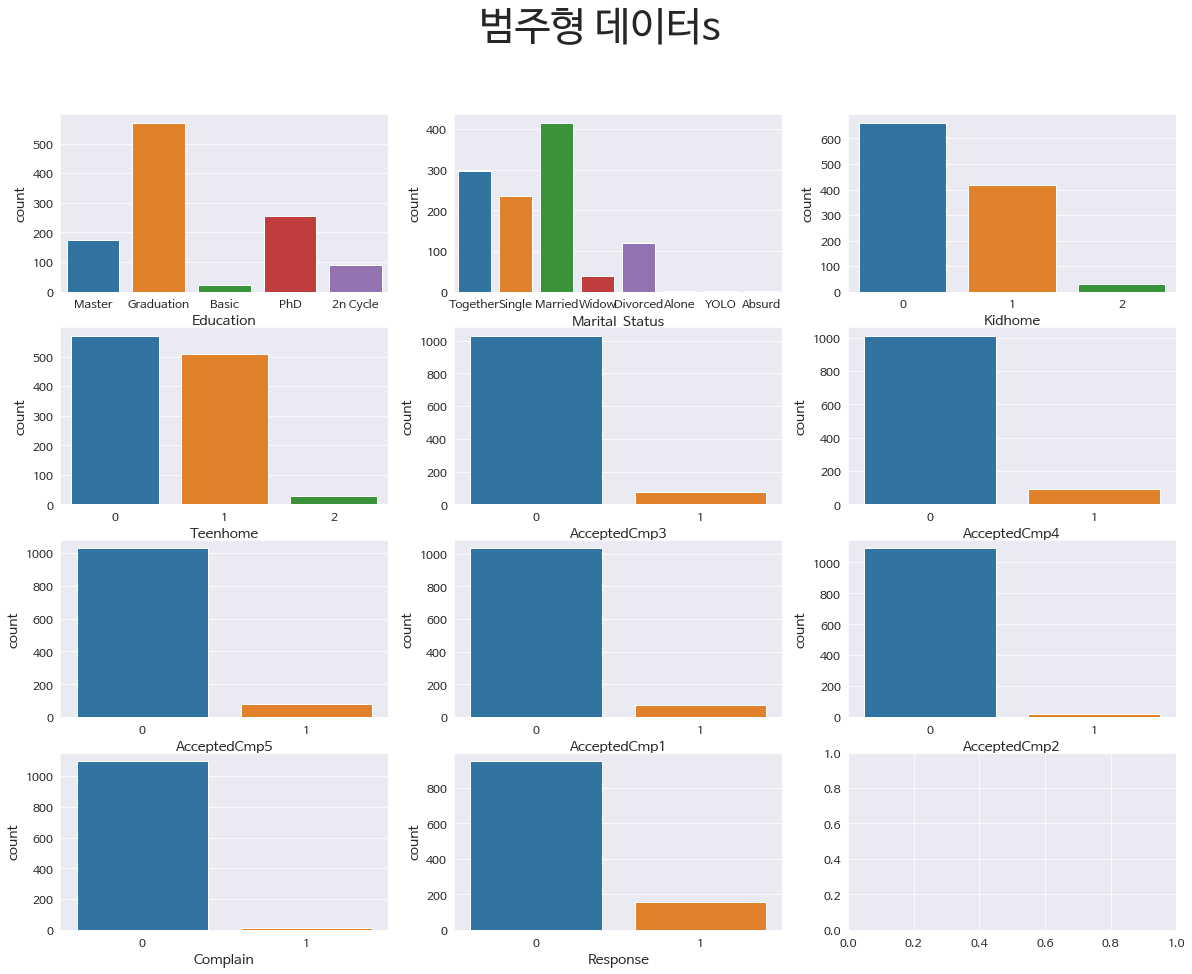

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.suptitle('범주형 데이터s', fontsize=40)

for ax, feature in zip(axes.flatten(), categorical):
    sns.countplot(data = train , x = feature, ax=ax)
plt.show()

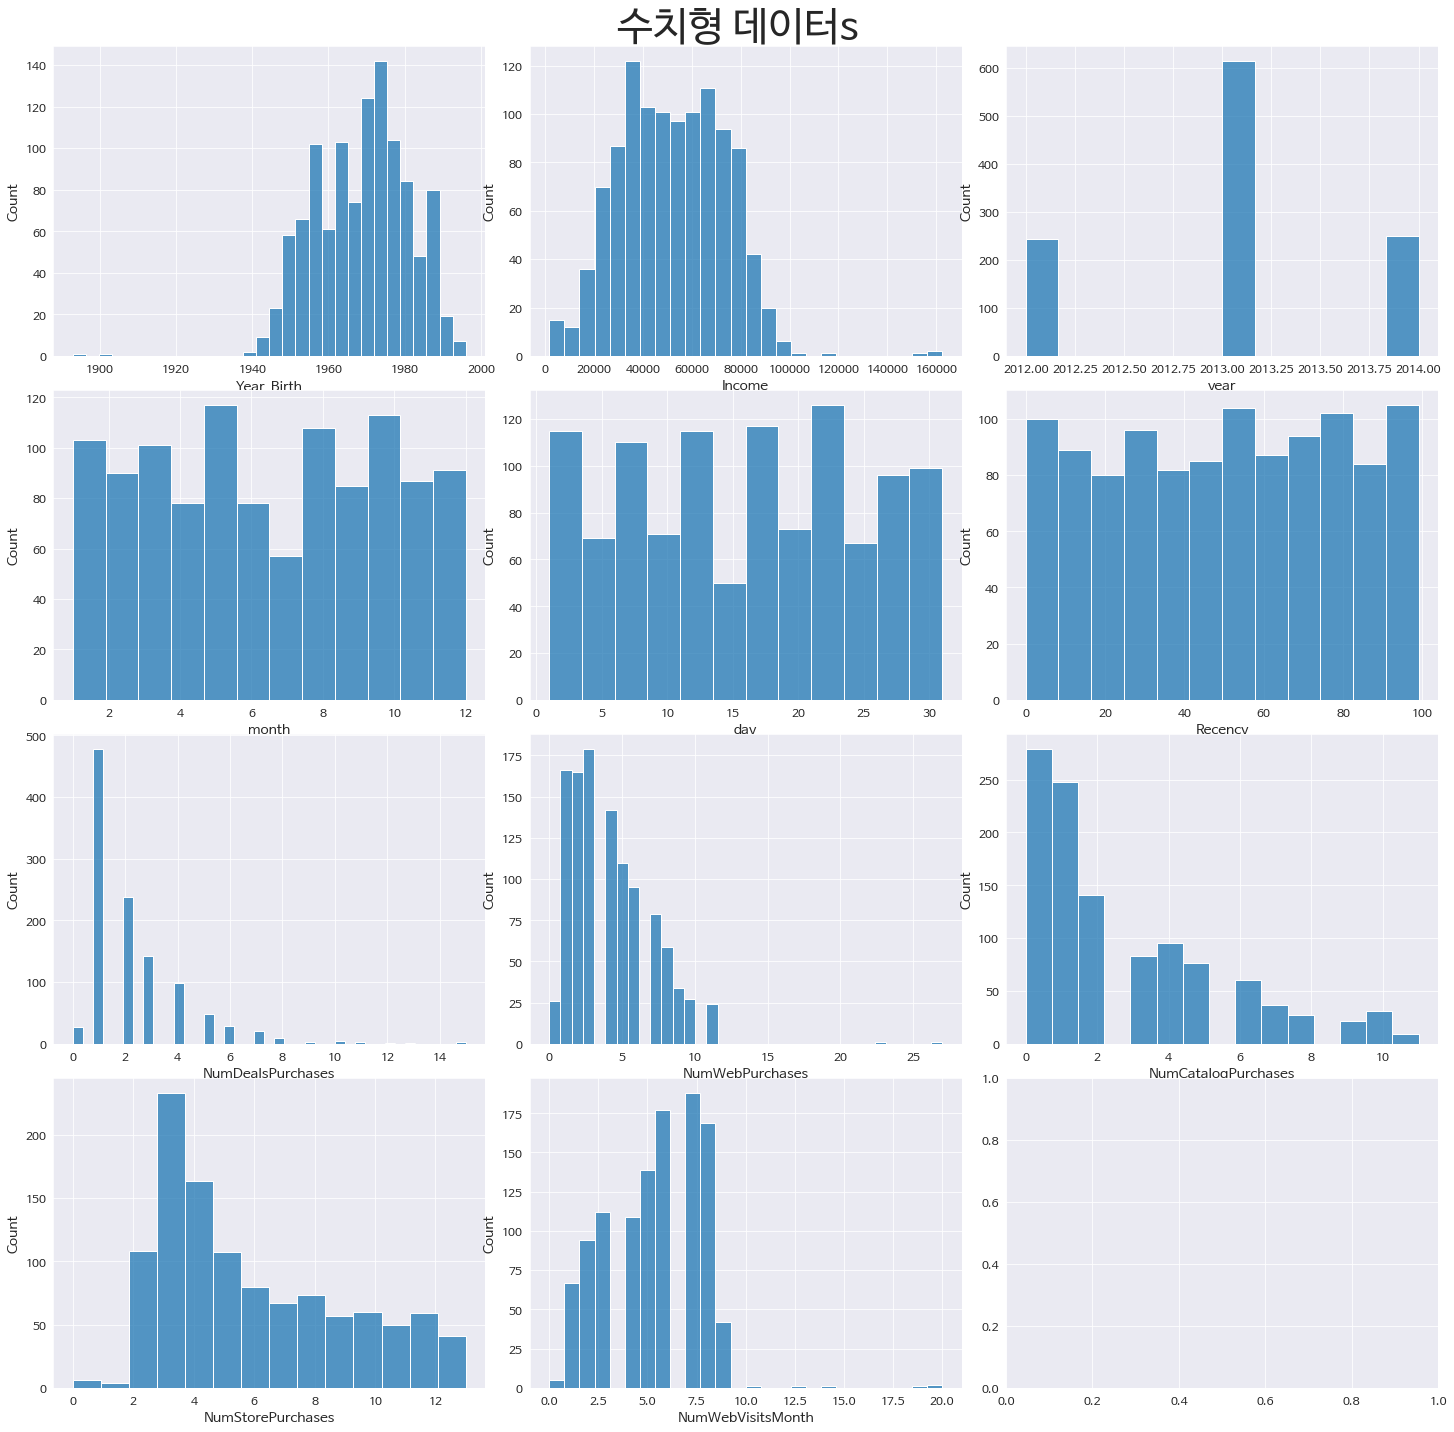

In [58]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('수치형 데이터s', fontsize=40)
plt.tight_layout()

for ax,feature in zip(axes.flatten(),quantitative):
    sns.histplot(data = train_test, x = feature, ax=ax)
plt.show()

Year_Birth와 Income은 정규화를 해야하는게 아닌지? -> 치우쳐 있음
Year_Birth, Income, NumDealsPurchases, NumWebPurchases, NumWebVisitsMonth에서 이상치 의심

Text(0.5, 1.0, '수치형 데이터들의 상관관계')

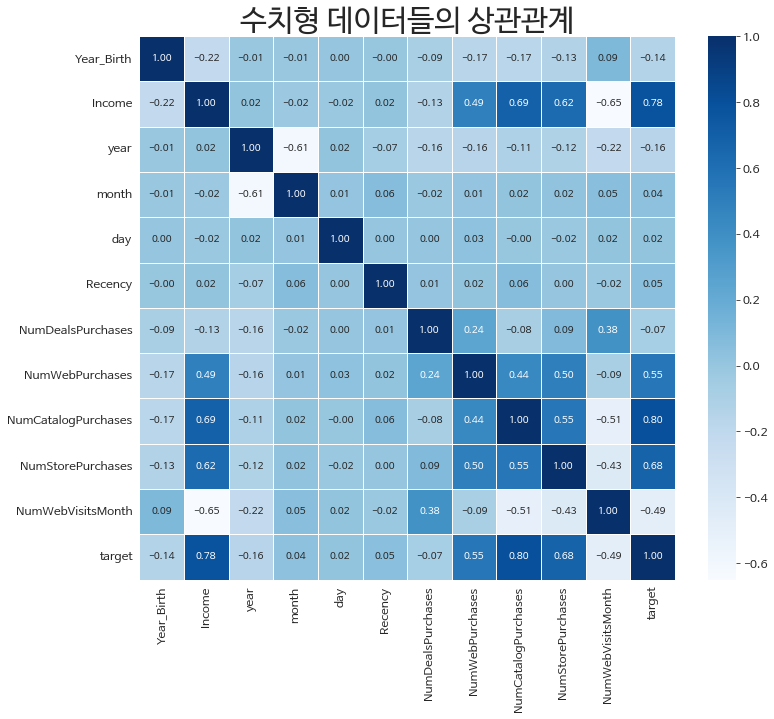

In [12]:
from sklearn.preprocessing import MinMaxScaler

train_corr = train[quantitative + ['target']]
scaler= MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('수치형 데이터들의 상관관계', fontsize=30)

target과 연관성이 높아보이는 Income, NumWebPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases에 주목.

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='NumWebPurchases', ylabel='Income'>,
        <AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Income'>,
        <AxesSubplot:xlabel='NumStorePurchases', ylabel='Income'>,
        <AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Income'>,
        <AxesSubplot:xlabel='target', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='NumWebPurchases'>,
        <AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebPurchases'>,
        <AxesSubplot:xlabel='NumCatalogPurchases', ylabel='NumWebPurchases'>,
        <AxesSubplot:xlabel='NumStorePurchases', ylabel='NumWebPurchases'>,
        <AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>,
        <AxesSubplot:xlabel='target', ylabel='NumWebPurchases'>],
       [<AxesSubplot:xlabel='Income', ylabel='NumCatalogPurchases'>,
        <AxesSubplot:xlabel='NumWebPurchases', ylabel='NumCatalogPurchases'>,
        <AxesSubplot:xlabel='NumCatal

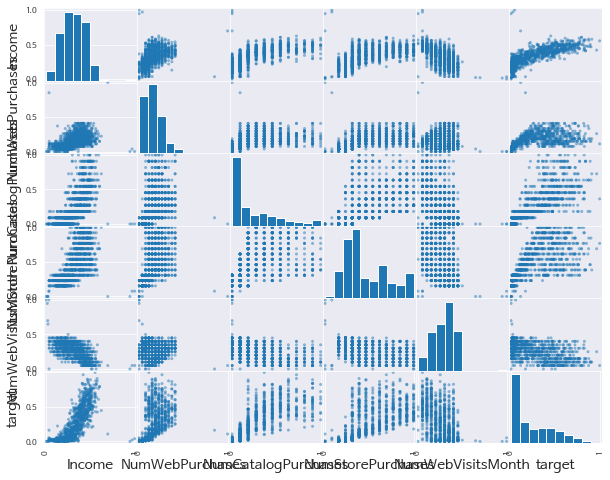

In [14]:
from pandas.plotting import scatter_matrix

attr = ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'target']
scatter_matrix(train_corr[attr], figsize=(10, 8))

# 테스트 데이터, 검증 데이터 분리

In [111]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy()
train_data, val_data = train_test_split(data, test_size=0.3)
train_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [112]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (775, 22)
검증할 val 셋 :  (333, 22)


In [113]:
train_X = train_data.drop(['target', 'index'], axis = 1)
train_y = train_data.target

val_X = val_data.drop(['target', 'index'], axis = 1)
val_y = val_data.target

# 전처리

### Dt_Customer -> year, month, day

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin

class DtCustomerSplitter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        year, month, day = list(), list(), list()
        for date in X.Dt_Customer:
            da, mo, ye = date.split('-')
            year.append(int(ye))
            month.append(int(mo))
            day.append(int(da))
        X['year']  = year
        X['month'] = month
        X['day']   = day
        return X.drop('Dt_Customer', axis=1)

# 파이프라인에 넣기

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(train_X.drop(['Marital_Status', 'Education'], axis=1))

num_pipeline = Pipeline([
        ('Dt_Customer_Splitter', DtCustomerSplitter(), num_attribs),
        ('std_scaler', StandardScaler()),
])

In [162]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_attribs = list(train_X.drop(['Marital_Status', 'Education'], axis=1))
sclaer_attribs = list(train_X.drop(['Marital_Status', 'Education', 'Dt_Customer'], axis=1))
onehot_attribs = ['Marital_Status']
ordinal_attribs = ['Education']
ms_cat = [['Married','Together','Single','Divorced','Widow','Alone','YOLO','Absurd']]
edu_cat = [['PhD','Master','Graduation','2n Cycle','Basic']]

my_pipeline = ColumnTransformer([
    ('Dt_Customer_Splitter', DtCustomerSplitter(), num_attribs),
    ('std_scaler', StandardScaler(), sclaer_attribs),
    ('OneHotEncoder', OneHotEncoder(categories=ms_cat, sparse=False), onehot_attribs),
    ('OrdinalEncoder', OrdinalEncoder(categories=edu_cat), ordinal_attribs)
])

train_X_prepared = my_pipeline.fit_transform(train_X)
val_X_prepared = my_pipeline.fit_transform(val_X)
train_X_prepared

array([[1.9560e+03, 3.5340e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9510e+03, 5.3790e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9660e+03, 3.7758e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [1.9710e+03, 2.5721e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9760e+03, 5.5412e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9660e+03, 6.7272e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00]])

# 선형 회귀 갈기기

In [163]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X_prepared, train_y)

LinearRegression()

In [164]:
y_predictions = lin_reg.predict(val_X_prepared)

In [165]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))

    return score

print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.2943136051397694


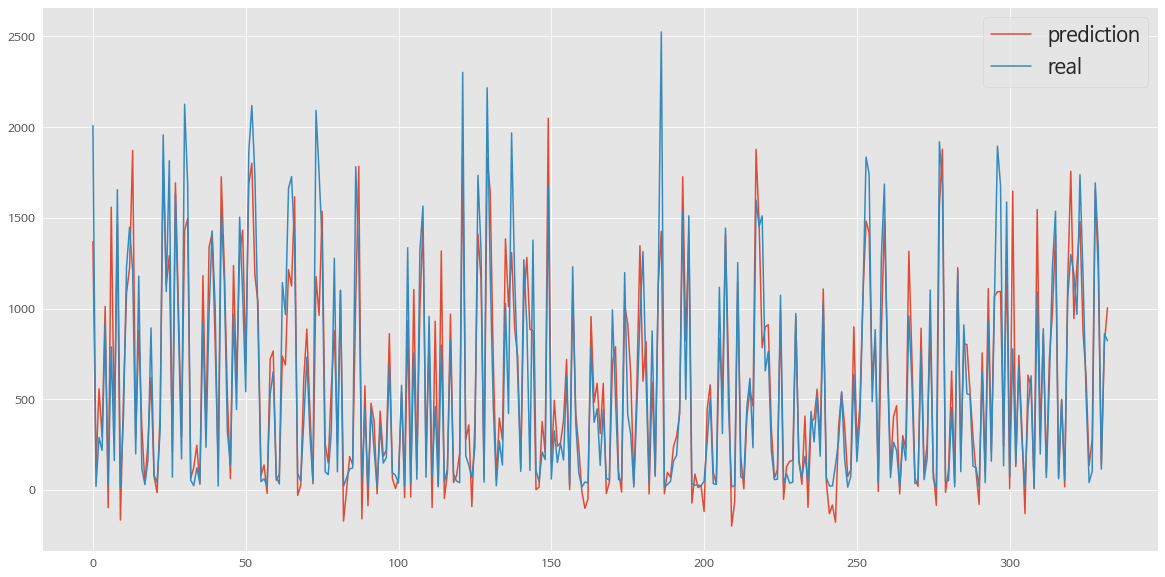

In [166]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label = 'prediction')
plt.plot(val_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

# Decision Tree 갈기기

In [167]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor()

In [168]:
y_predictions = tree_reg.predict(val_X_prepared)

In [169]:
print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.27885818440198334


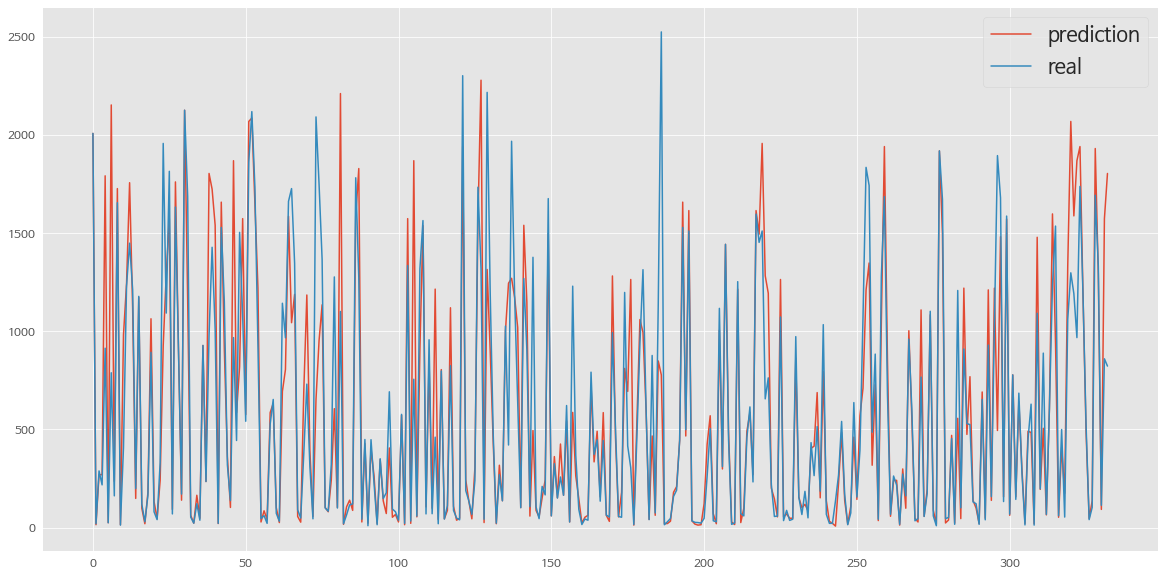

In [170]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label = 'prediction')
plt.plot(val_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [177]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_X_prepared, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Random Forest 갈기기

In [198]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_X_prepared, train_y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [199]:
y_predictions = forest_reg.predict(val_X_prepared)
forest_mse = mean_squared_error(val_y, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

208.31945914161994

In [197]:
print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.20576365611661168


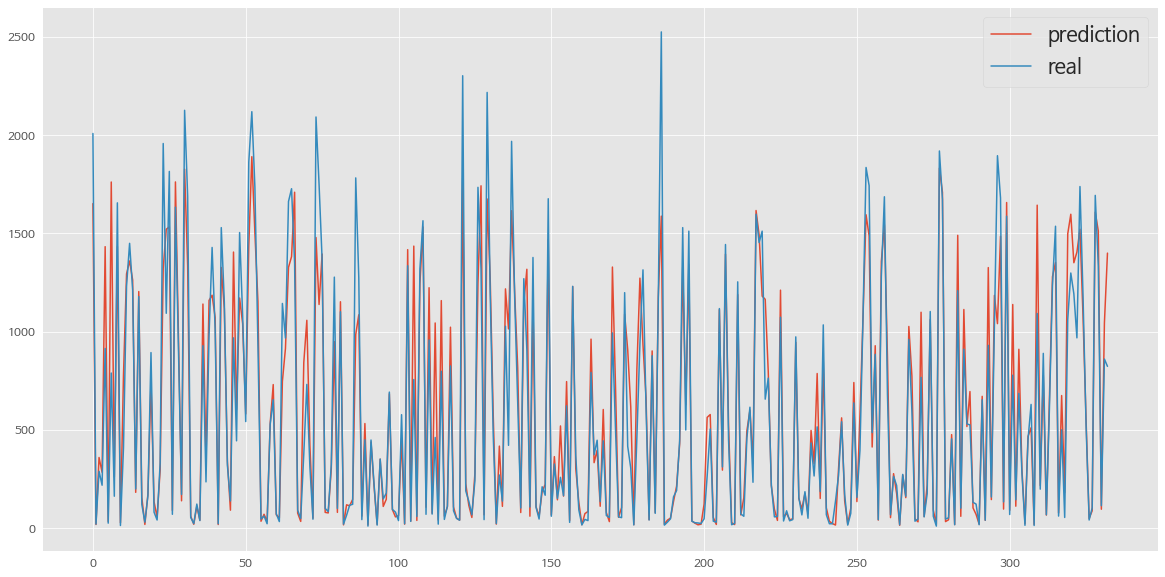

In [190]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label='prediction')
plt.plot(val_y, label='real')
plt.legend(fontsize=20)
plt.show()

# Grid Search

In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [33, 35, 34], 'max_features': [7, 8, 9]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)
grid_search.fit(train_X_prepared, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [7, 8, 9],
                          'n_estimators': [33, 35, 34]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [205]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 35}

In [208]:
forest_reg_best = grid_search.best_estimator_
forest_reg_best.fit(train_X_prepared, train_y)
y_predictions = forest_reg_best.predict(val_X_prepared)

In [209]:
print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.19834058957616632


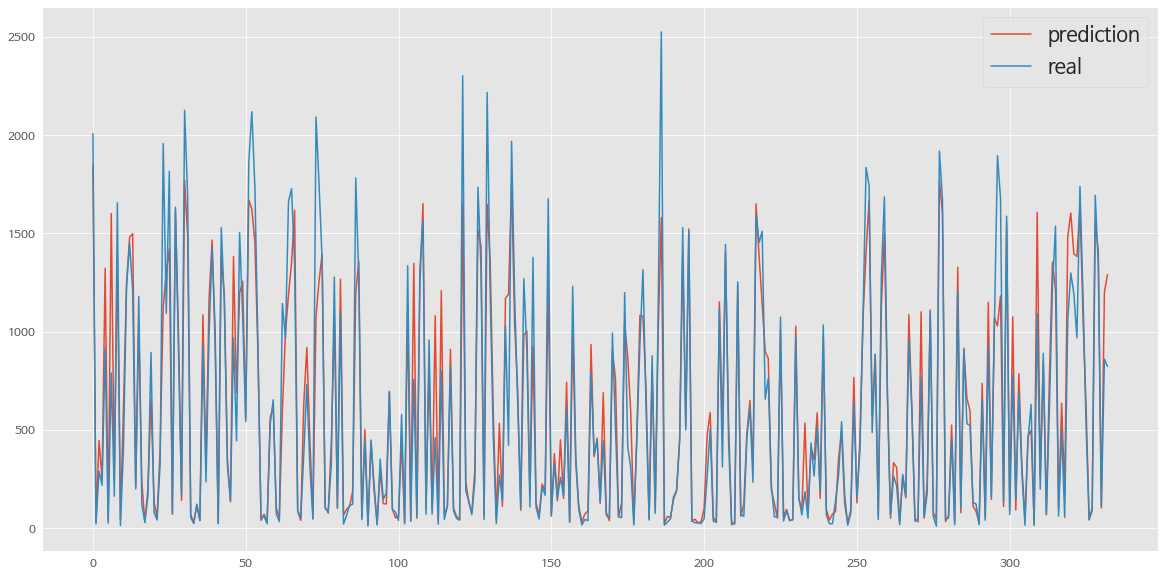

In [210]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label='prediction')
plt.plot(val_y, label='real')
plt.legend(fontsize=20)
plt.show()

# test.csv 넣기

In [211]:
data = test.drop('id', axis = 1).copy()
X = data

In [212]:
num_attribs = list(train_X.drop(['Marital_Status', 'Education'], axis=1))
sclaer_attribs = list(train_X.drop(['Marital_Status', 'Education', 'Dt_Customer'], axis=1))
onehot_attribs = ['Marital_Status']
ordinal_attribs = ['Education']
ms_cat = [['Married','Together','Single','Divorced','Widow','Alone','YOLO','Absurd']]
edu_cat = [['PhD','Master','Graduation','2n Cycle','Basic']]

my_pipeline = ColumnTransformer([
    ('Dt_Customer_Splitter', DtCustomerSplitter(), num_attribs),
    ('std_scaler', StandardScaler(), sclaer_attribs),
    ('OneHotEncoder', OneHotEncoder(categories=ms_cat, sparse=False), onehot_attribs),
    ('OrdinalEncoder', OrdinalEncoder(categories=edu_cat), ordinal_attribs)
])

X_prepared = my_pipeline.fit_transform(X)

In [213]:
X_prepared

array([[1.9790e+03, 5.7537e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9550e+03, 6.5748e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9840e+03, 5.5434e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [1.9890e+03, 3.3996e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9700e+03, 7.4854e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9750e+03, 4.6098e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [214]:
y_predictions = forest_reg_best.predict(X_prepared)

In [215]:
y_predictions

array([ 591.65714286,  830.42857143,  770.85714286, ...,   78.28571429,
       1115.91428571,  235.48571429])

In [216]:
submission = pd.read_csv('../data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [217]:
submission['target'] = y_predictions
submission.to_csv("../data/submission_baseline2.csv", index=False)